In [1]:
import scipy
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
EEG_before = scipy.io.loadmat('EEG_av.mat')
EEG_during = scipy.io.loadmat('EEG_pe.mat')
EEG_after = scipy.io.loadmat('EEG_ap.mat')

EEG_before = EEG_before['EEG_before']
EEG_during = EEG_during['EEG_during']
EEG_after = EEG_after['EEG_after']

# Set sampling frequency variable
fs = 512

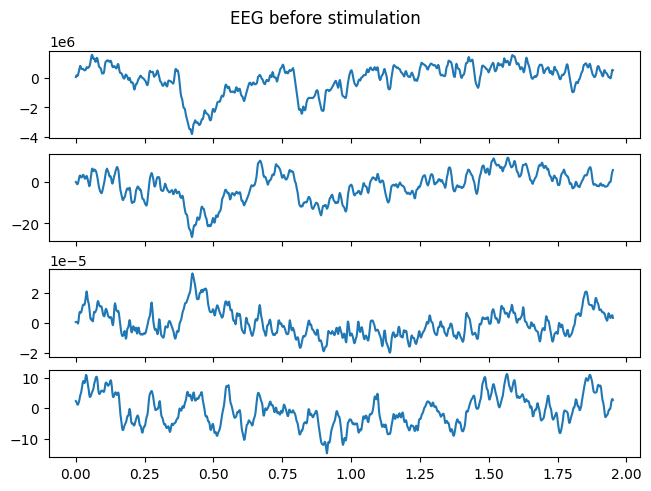

In [3]:
# Plot 4 EEG leads before stimulation
fig, axes = plt.subplots(
    4, 1, sharex='all', constrained_layout=True)
plt.suptitle('EEG before stimulation')
time = np.arange(0, len(EEG_before)/fs, 1/fs)
for i in np.arange(4):
    axes[i].plot(time, EEG_before[:, i])

In [4]:
# Perform SVD 
Ub, Sb, Vb = np.linalg.svd(EEG_before)

# Print singular values divided by max value
Before = 'Singular values before stimulation: {:.5f}, {:.5f}, {:.5f}, {:.5f}'
print(Before.format(Sb[0]/max(Sb), Sb[1]/max(Sb), Sb[2]/max(Sb), Sb[3]/max(Sb)))

Singular values before stimulation: 1.00000, 0.00001, 0.00000, 0.00000


### Question 2.1 a)

**Answer**

From these singular values, this means that all four signals are mainly varying along the same component, i.e. they are correlated.

### Question 2.1 b)

In [5]:
# Implement here the pre-processing of the signals
EEG_before = scipy.stats.zscore(EEG_before)

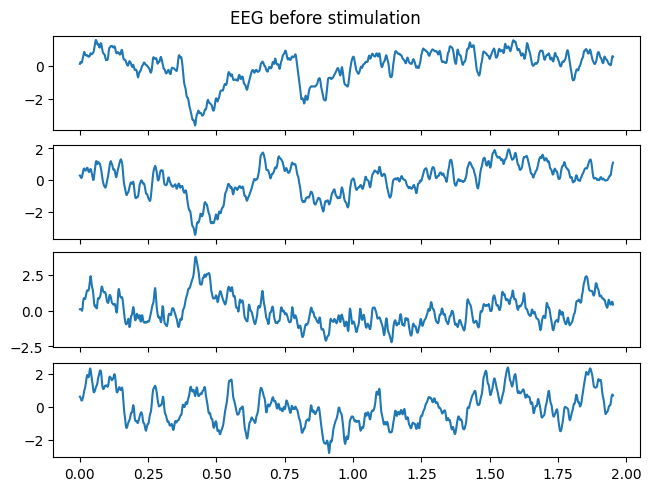

In [6]:
# Plot 4 EEG leads before stimulation after pre-processing
fig, axes = plt.subplots(
    4, 1, sharex='all', constrained_layout=True)
plt.suptitle('EEG before stimulation')
time = np.arange(0, len(EEG_before)/fs, 1/fs)
for i in np.arange(4):
    axes[i].plot(time, EEG_before[:, i])

In [7]:
# Perform here the svd 
Ub, Sb, Vb = np.linalg.svd(EEG_before)

# Print singular values divided by max value
Before = 'Singular values before stimulation: {:.5f}, {:.5f}, {:.5f}, {:.5f}'
print(Before.format(Sb[0]/max(Sb), Sb[1]/max(Sb), Sb[2]/max(Sb), Sb[3]/max(Sb)))

Singular values before stimulation: 1.00000, 0.82741, 0.27099, 0.23259


### Question 2.1 c)

**Answer**

Here, one notices a higher variation along all components, as they are all different from zero. This means that the signals are independant from each other now that they are normalized. This noticeable difference probably is due to the removal of the mean and the division by the standard deviation, which reduces the dependency of the signals with each other.

### Question 2.2

In [8]:
# Implement here the pre-processing of the signals during and after stimulation
EEG_during = scipy.stats.zscore(EEG_during)
EEG_after = scipy.stats.zscore(EEG_after)

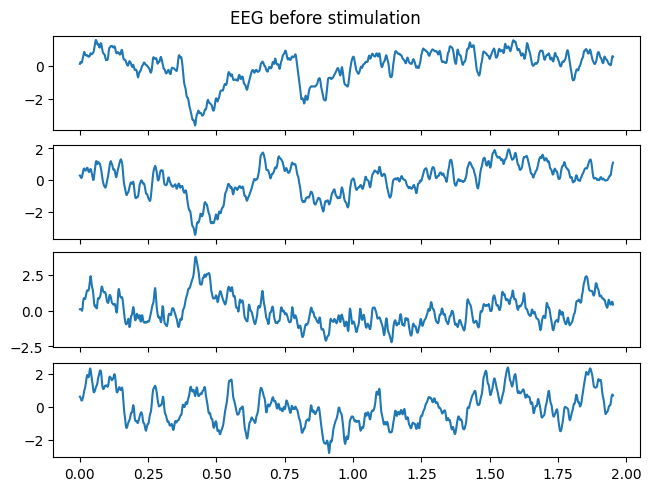

In [9]:
# Plot 4 EEG leads before stimulation
fig, axes = plt.subplots(
    4, 1, sharex='all', constrained_layout=True)
plt.suptitle('EEG before stimulation')
time = np.arange(0, len(EEG_before)/fs, 1/fs)
for i in np.arange(4):
    axes[i].plot(time, EEG_before[:, i])

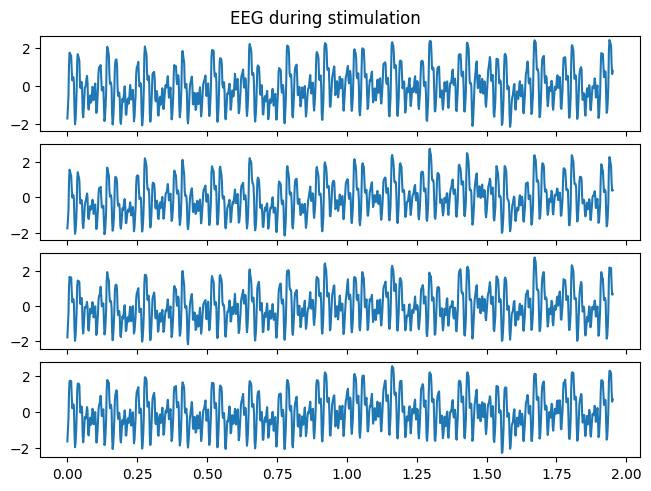

In [10]:
# Plot 4 EEG leads during stimulation
fig, axes = plt.subplots(
    4, 1, sharex='all', constrained_layout=True)
plt.suptitle('EEG during stimulation')
time = np.arange(0, len(EEG_during)/fs, 1/fs)
for i in np.arange(4):
    axes[i].plot(time, EEG_during[:, i])

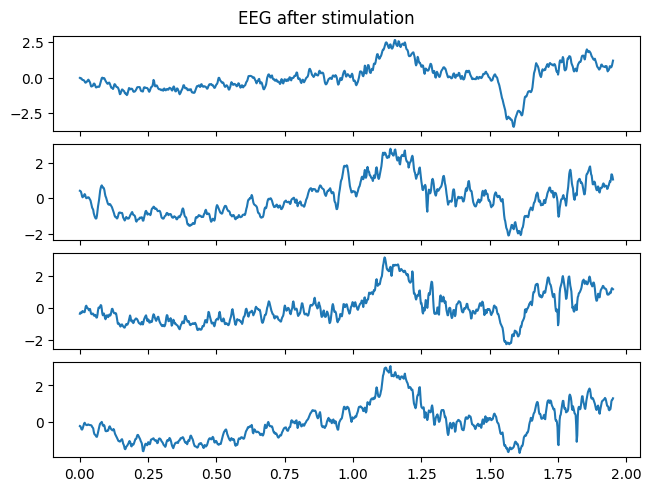

In [11]:
# Plot 4 EEG leads after stimulation
fig, axes = plt.subplots(
    4, 1, sharex='all', constrained_layout=True)
plt.suptitle('EEG after stimulation')
time = np.arange(0, len(EEG_after)/fs, 1/fs)
for i in np.arange(4):
    axes[i].plot(time, EEG_after[:, i])

In [12]:
Ub, Sb, Vb = np.linalg.svd(EEG_before)
Ud, Sd, Vd = np.linalg.svd(EEG_during)
Ua, Sa, Va = np.linalg.svd(EEG_after)
# Print singular values
Before = 'Singular values before: {:.5f}, {:.5f}, {:.5f}, {:.5f}'
print(Before.format(Sb[0]/max(Sb), Sb[1]/max(Sb), Sb[2]/max(Sb), Sb[3]/max(Sb)))
During = 'Singular values during: {:.5f}, {:.5f}, {:.5f}, {:.5f}'
print(During.format(Sd[0]/max(Sd), Sd[1]/max(Sd), Sd[2]/max(Sd), Sd[3]/max(Sd)))
After = 'Singular values after: {:.5f}, {:.5f}, {:.5f}, {:.5f}'
print(After.format(Sa[0]/max(Sa), Sa[1]/max(Sa), Sa[2]/max(Sa), Sa[3]/max(Sa)))

Singular values before: 1.00000, 0.82741, 0.27099, 0.23259
Singular values during: 1.00000, 0.10128, 0.07567, 0.06634
Singular values after: 1.00000, 0.21414, 0.17477, 0.09851


### Question 2.2

**a)**

The singular values during the simulation are all very low, apart from the highest one, meaning that the signals all vary along a single component and they are all strongly correlated.

**b)**

One notices that the singular values of the signals after simulation have significantly lower values than the ones before, but are still higher than during the simulation. This shows that there is a leftover effect on the signals from the stimulation.